In [17]:
import pandas as pd
from datetime import datetime as dt
import seaborn as sns

In [25]:
df = pd.read_csv("./extracted_files/contest_results.csv", parse_dates=["contest_date"])
df = df[['contest_date', 'contest_name', 'organization', 'division', 'class', 'competitor_name']]
df_pro_card = df[df['class'].str.contains('pro card')][['division', 'competitor_name']]

In [26]:
df_elo = pd.read_csv('contest_results_elo.csv', parse_dates=['contest_date'])

In [27]:
df_ifbb_open = df_elo[(df_elo["organization"] == "ifbb") & (df_elo["class"] == "open")]
df_ifbb_open = pd.merge(df_ifbb_open, df_pro_card, how='inner', on=['division', 'competitor_name'])
df_ifbb_open.head()

,Unnamed: 0,organization,contest_name,contest_date,division,class,competitor_name,placing,elo_rating,elo_rank
0,17219,ifbb,ifbb pro grand prix,2012-04-14,women's physique,open,donna jones,13.0,1500.000000,5.0
1,17656,ifbb,ifbb emerald cup,2012-04-21,women's bodybuilding,open,tarna alderman,2.0,1500.000000,2.0
2,17953,ifbb,ifbb toronto pro,2012-06-01,bikini,open,pollianna moss,1.0,1580.067732,2.0
3,18038,ifbb,ifbb greater gulf states pro,2012-06-22,men's physique,open,trevor larsen,4.0,1603.083155,2.0
4,18151,ifbb,ifbb los angeles grand prix pro bikini,2012-07-21,bikini,open,katherine portillo,9.0,1669.304024,1.0


In [28]:
df_first_pro = pd.DataFrame(
    df_ifbb_open
    .groupby(["division", "competitor_name"])["contest_date"]
    .min()
).reset_index()
df_first_pro_elo = pd.merge(df_ifbb_open, df_first_pro, on=['division', 'competitor_name', 'contest_date'])
df_first_pro_elo["contest_year"] = df_first_pro_elo["contest_date"].dt.year
df_starting_elo = pd.DataFrame(df_first_pro_elo.groupby(["division", "contest_year"])["elo_rating"].mean()).reset_index()
df_starting_elo

,division,contest_year,elo_rating
0,bikini,2012,1624.945320
1,bikini,2013,1657.200406
2,bikini,2014,1715.759598
3,bikini,2015,1715.285455
4,bikini,2016,1745.832545
...,...,...,...
90,women's physique,2019,1549.307298
91,women's physique,2020,1513.603993
92,women's physique,2021,1555.892847
93,women's physique,2022,1535.227076


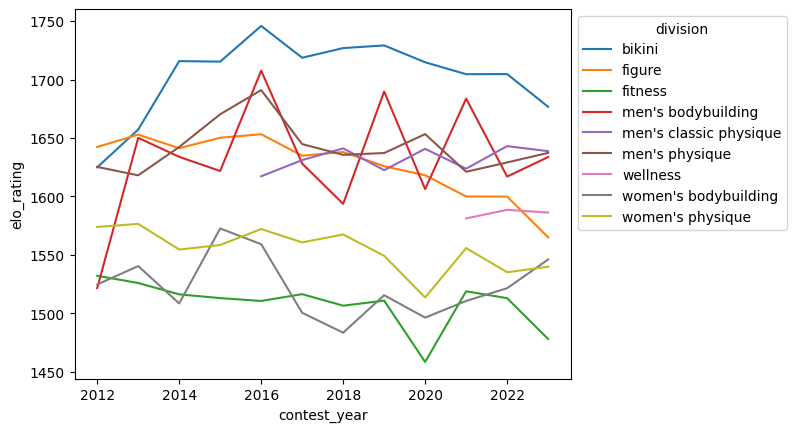

In [29]:
ax = sns.lineplot(
    data=df_starting_elo,
    x="contest_year",
    y="elo_rating",
    hue="division"
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [22]:
df[df['competitor_name'] == 'pricila rodriguez']['organization'].unique()

array(['ifbb'], dtype=object)